```{contents}
```

# Performance Metrics

## Confusion Matrix

* A **summary table** of predictions vs. actual outcomes.

|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

* Helps derive all other metrics.

---

## Accuracy

* **Overall correctness** of the model.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* **Good when classes are balanced**, misleading if data is imbalanced.

---

## Precision (Positive Predictive Value)

* Out of all predicted positives, how many are actually positive?

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* Useful when **false positives are costly** (e.g., spam filters).

---

## Recall (Sensitivity / True Positive Rate)

* Out of all actual positives, how many did we correctly predict?

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* Useful when **false negatives are costly** (e.g., disease detection).

---

## Specificity (True Negative Rate)

* Out of all actual negatives, how many did we correctly predict?

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

* Complements recall: **focuses on negatives**.

---

## F1 Score

* **Harmonic mean** of precision and recall.

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* Good when we need a **balance between precision and recall**.

---

## F-beta Score

* Weighted version of F1.

$$
F_\beta = (1+\beta^2)\cdot \frac{\text{Precision}\cdot\text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}
$$

* β > 1 → more weight on recall.
* β < 1 → more weight on precision.

---

## ROC Curve & AUC

* **ROC Curve**: Plots **TPR (Recall)** vs. **FPR (1 - Specificity)** at different thresholds.
* **AUC (Area Under Curve)**: Measures how well the model separates classes.

  * AUC = 1 → perfect model.
  * AUC = 0.5 → random guessing.

---

## Log Loss (Cross-Entropy Loss)

* Measures how well predicted probabilities match actual labels.

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^N \big[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \big]
$$

* Lower log loss = better model.

---

**Summary:**

* **Accuracy** → overall correctness (works best for balanced data).
* **Precision** → good when FP is costly.
* **Recall** → good when FN is costly.
* **F1 / F-beta** → balance precision and recall.
* **ROC-AUC** → good for comparing models.
* **Log Loss** → probability-based evaluation.



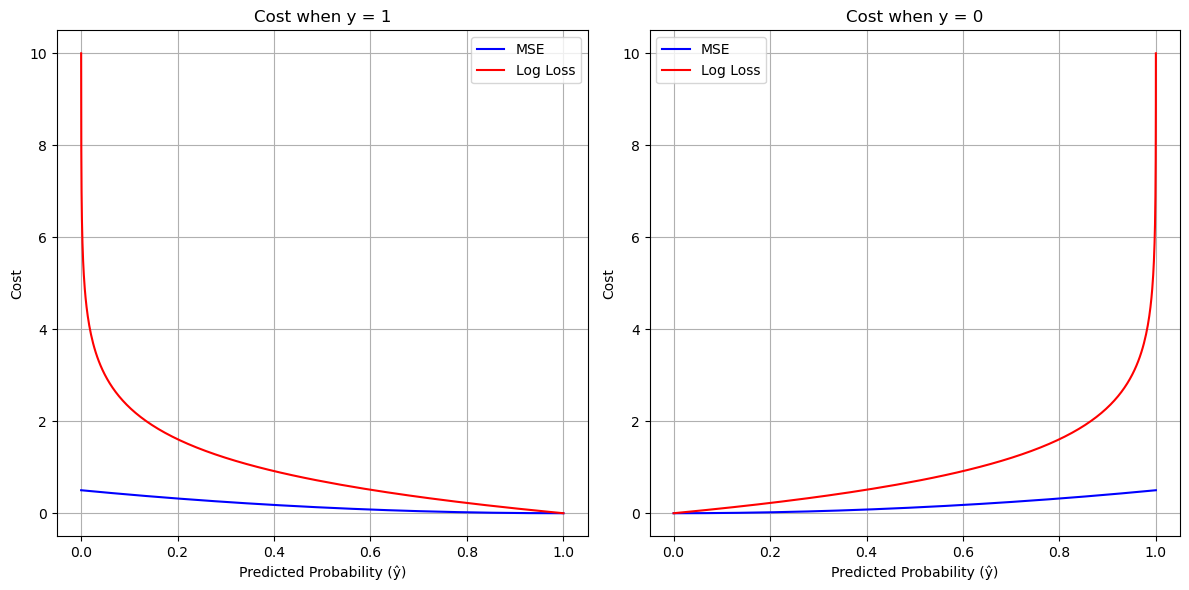

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define MSE cost for binary classification
def mse_cost(y, y_hat):
    return 0.5 * (y_hat - y)**2

# Define log loss cost
def log_loss(y, y_hat):
    eps = 1e-10  # avoid log(0)
    return -(y*np.log(y_hat + eps) + (1-y)*np.log(1 - y_hat + eps))

# Generate predictions from sigmoid
z = np.linspace(-10, 10, 200)
y_hat = sigmoid(z)

# Compute costs for y=1 and y=0
mse_y1 = mse_cost(1, y_hat)
mse_y0 = mse_cost(0, y_hat)
log_y1 = log_loss(1, y_hat)
log_y0 = log_loss(0, y_hat)

# Plotting
plt.figure(figsize=(12, 6))

# For y=1
plt.subplot(1, 2, 1)
plt.plot(y_hat, mse_y1, label="MSE", color="blue")
plt.plot(y_hat, log_y1, label="Log Loss", color="red")
plt.title("Cost when y = 1")
plt.xlabel("Predicted Probability (ŷ)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)

# For y=0
plt.subplot(1, 2, 2)
plt.plot(y_hat, mse_y0, label="MSE", color="blue")
plt.plot(y_hat, log_y0, label="Log Loss", color="red")
plt.title("Cost when y = 0")
plt.xlabel("Predicted Probability (ŷ)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


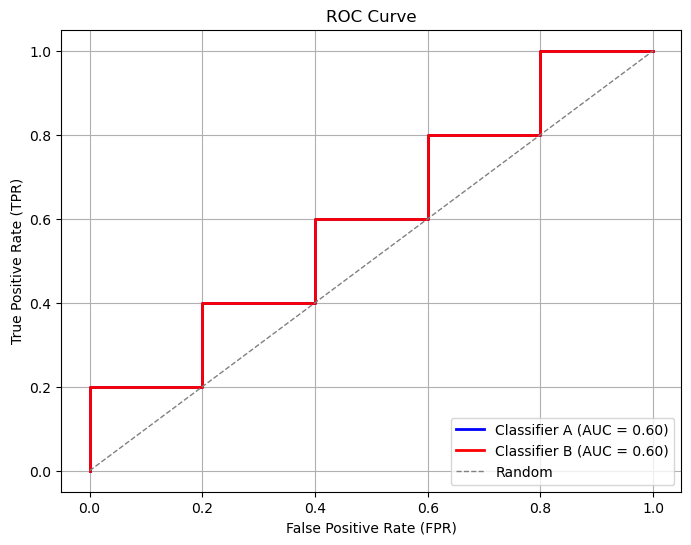

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulated probabilities and true labels
y_true = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
y_scores_a = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05])
y_scores_b = np.array([0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01])

# Compute ROC curves
fpr_a, tpr_a, _ = roc_curve(y_true, y_scores_a)
fpr_b, tpr_b, _ = roc_curve(y_true, y_scores_b)

# Compute AUC
auc_a = auc(fpr_a, tpr_a)
auc_b = auc(fpr_b, tpr_b)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_a, tpr_a, color='blue', lw=2, label=f'Classifier A (AUC = {auc_a:.2f})')
plt.plot(fpr_b, tpr_b, color='red', lw=2, label=f'Classifier B (AUC = {auc_b:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
